In [5]:
import pandas as pd
import numpy as np
import joblib

In [6]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [9]:
print('rows =', df.shape[0])

rows = 5110


# Data Cleaning

In [10]:
# Finding missing data

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# As count of missing values is very less so we are removing the missing values

df.dropna(inplace = True)


In [12]:
# now there are no missing values

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# printing number of remaining rows after removing missing values

print('Remaining rows =', df.shape[0])

Remaining rows = 4909


In [14]:
# Finding duplicates

duplicates = df[df.duplicated()]

In [15]:
# There are no duplicates in our dataset
print(duplicates)
print('\n')
print("Number of duplicates =", len(duplicates))

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Number of duplicates = 0


In [16]:
# printing datatypes of attributes

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

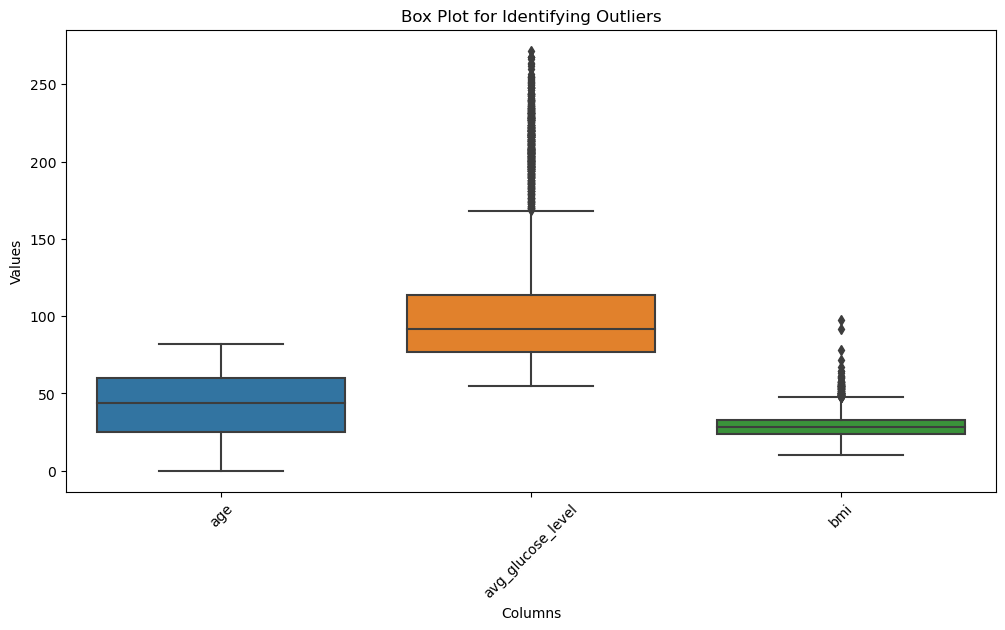

In [18]:
# Visualizing outliers

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']]) 

plt.title('Box Plot for Identifying Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.xticks(rotation=45) 
plt.show()


In [19]:
# checking skewness in numeric attributes

df[['age', 'avg_glucose_level', 'bmi']].skew()

age                 -0.119070
avg_glucose_level    1.614026
bmi                  1.055340
dtype: float64

In [20]:
# Handling outliers

In [21]:
# Finding outliers in 'age' using IQR

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

print(outliers)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [22]:
# There are no outliers in age column
print("Number of outliers in age column =", len(outliers))

Number of outliers in age column = 0


In [23]:
# Finding outliers in 'avg_glucose_level' using IQR

Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)]

print(len(outliers))

567


In [24]:
# Replacing outliers using interpolation

df['avg_glucose_level'] = np.where((df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound), np.nan, df['avg_glucose_level'])
df['avg_glucose_level'].interpolate(method='linear', inplace=True)


In [25]:
# to fill first and last row value

df['avg_glucose_level'].fillna(method='ffill', inplace=True) 
df['avg_glucose_level'].fillna(method='bfill', inplace=True) 

In [26]:
# Applying logarithmic transformation to reduce skewness

df['avg_glucose_level'] = np.log(df['avg_glucose_level'])

In [27]:
# Finding outliers in 'bmi' using IQR

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

print(outliers)

         id  gender   age  hypertension  heart_disease ever_married  \
21    13861  Female  52.0             1              0          Yes   
113   41069  Female  45.0             0              0          Yes   
254   32257  Female  47.0             0              0          Yes   
258   28674  Female  74.0             1              0          Yes   
270   72911  Female  57.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4858   1696  Female  43.0             0              0          Yes   
4906  72696  Female  53.0             0              0          Yes   
4952  16245    Male  51.0             1              0          Yes   
5009  40732  Female  50.0             0              0          Yes   
5057  38349  Female  49.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
21    Self-employed          Urban           4.550503  48.9     nev

In [28]:
# Finding median of 'bmi'

median_bmi = df['bmi'].median()
print(median_bmi)

28.1


In [29]:
# Replacing outliers with median of 'bmi'

df.loc[outliers.index, 'bmi'] = median_bmi
df.loc[outliers.index].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,4.550503,28.1,never smoked,1
113,41069,Female,45.0,0,0,Yes,Private,Rural,4.321679,28.1,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,4.782772,28.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,4.348664,28.1,never smoked,0
270,72911,Female,57.0,1,0,Yes,Private,Rural,4.863990,28.1,smokes,0


In [30]:
# skewness

df[['age', 'avg_glucose_level', 'bmi']].skew()

age                 -0.119070
avg_glucose_level    0.225096
bmi                  0.325955
dtype: float64

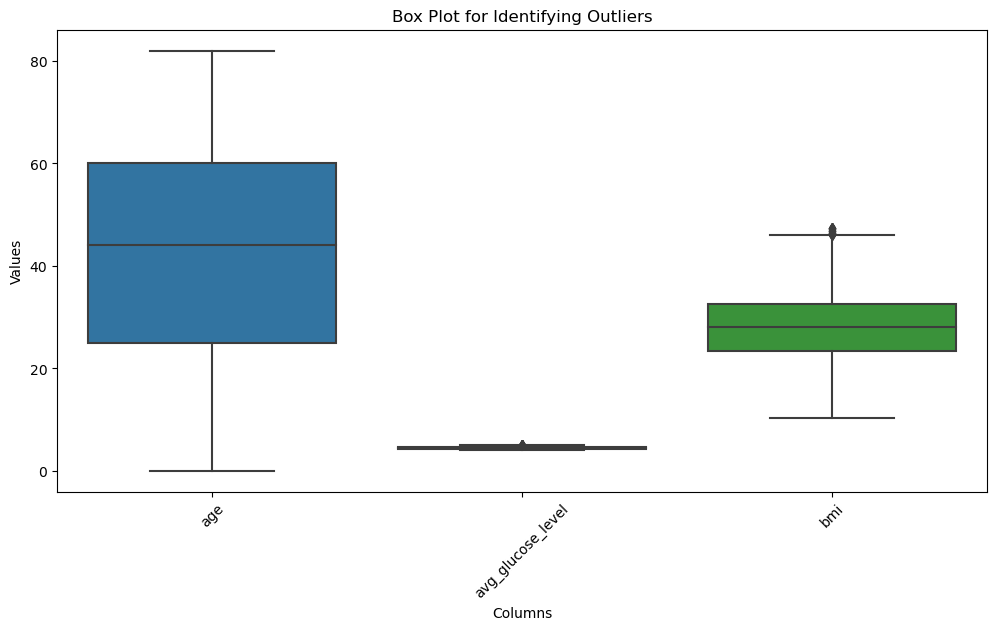

In [31]:
# Visualizing outliers

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']]) 

plt.title('Box Plot for Identifying Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.xticks(rotation=45) 
plt.show()


In [32]:
# Finding new outliers and then removing them

Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)]

# print(outliers)
print("Number of outliers =", len(outliers))

df = df[~((df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound))]

print("Number of remaining rows =", df.shape[0])


Number of outliers = 8
Number of remaining rows = 4901


In [33]:
# Finding new outliers and then removing them

Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)]

# print(outliers)
print("Number of outliers =", len(outliers))

df = df[~((df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound))]

print("Number of remaining rows =", df.shape[0])

Number of outliers = 2
Number of remaining rows = 4899


In [34]:
# Finding new outliers and then removing them

Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)]

# print(outliers)
print("Number of outliers =", len(outliers))

df = df[~((df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound))]

print("Number of remaining rows =", df.shape[0])

Number of outliers = 0
Number of remaining rows = 4899


In [35]:
# Finding new outliers and then removing them

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# print(outliers)
print("Number of outliers =", len(outliers))

df = df[~((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound))]

print("Number of remaining rows =", df.shape[0])

Number of outliers = 19
Number of remaining rows = 4880


In [36]:
# Finding new outliers and then removing them

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# print(outliers)
print("Number of outliers =", len(outliers))

df = df[~((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound))]

print("Number of remaining rows =", df.shape[0])

Number of outliers = 7
Number of remaining rows = 4873


In [37]:
# Finding new outliers and then removing them

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# print(outliers)
print("Number of outliers =", len(outliers))

df = df[~((df['bmi'] < lower_bound) | (df['bmi'] > upper_bound))]

print("Number of remaining rows =", df.shape[0])

Number of outliers = 0
Number of remaining rows = 4873


In [38]:
# skewness

df[['age', 'avg_glucose_level', 'bmi']].skew()

age                 -0.120086
avg_glucose_level    0.205726
bmi                  0.277244
dtype: float64

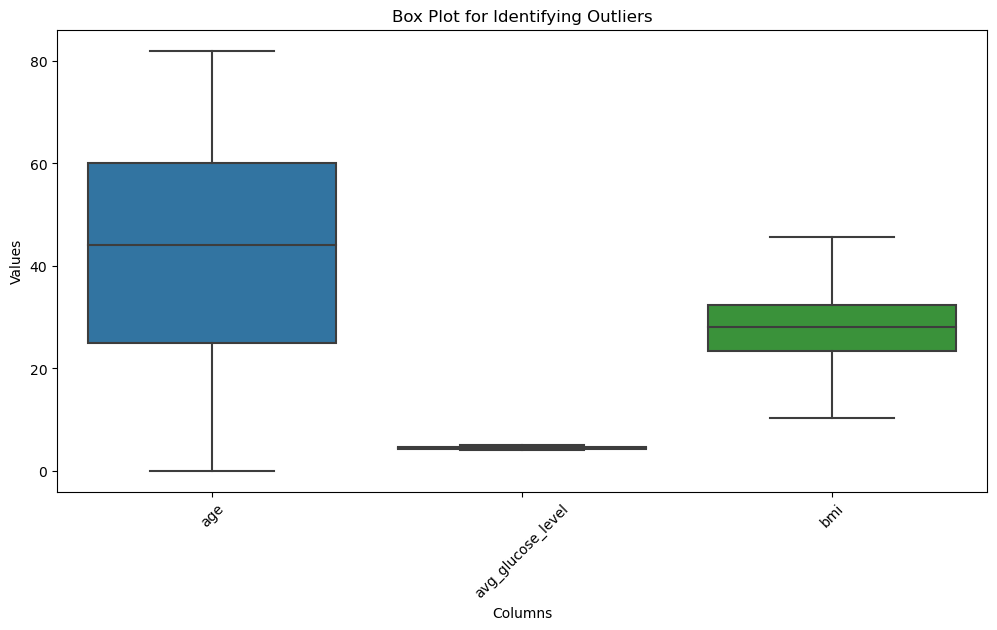

In [39]:
# Visualizing outliers

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']]) 

plt.title('Box Plot for Identifying Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.xticks(rotation=45) 
plt.show()


# EDA

# Univariate Analysis 

# Numeric Variables

Summary statistics for age:
count    4873.000000
mean       42.868467
std        22.587424
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64


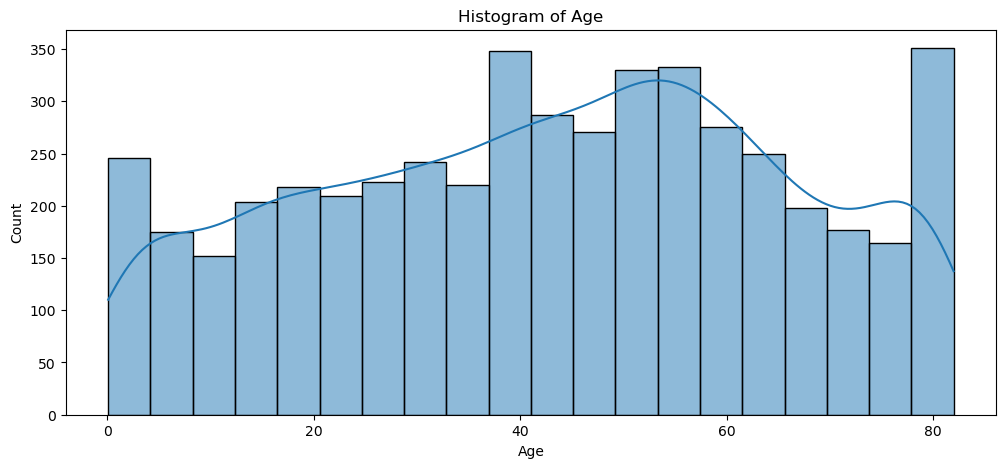

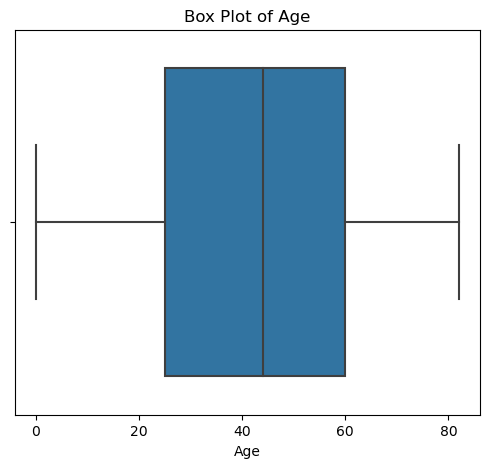

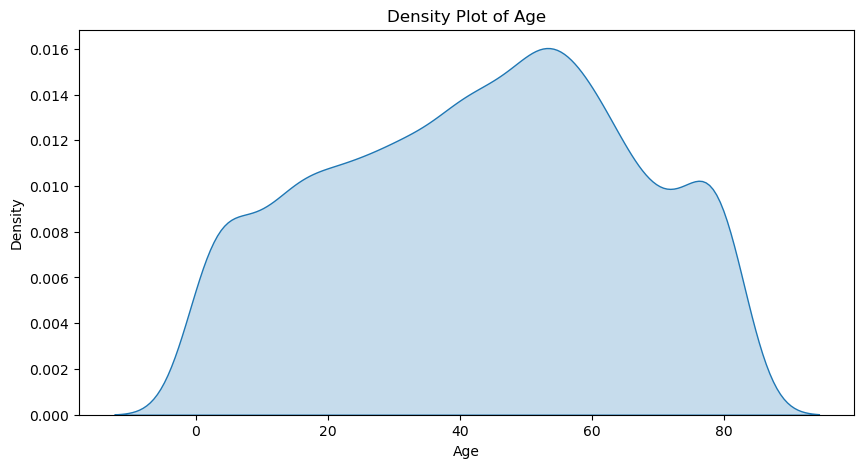

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for age
print("Summary statistics for age:")
print(df['age'].describe())

# Histogram for age
plt.figure(figsize=(12, 5))
sns.histplot(df['age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

# Box Plot for age
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Density Plot for age
plt.figure(figsize=(10, 5))
sns.kdeplot(df['age'], fill=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


Summary statistics for avg_glucose_level:
count    4873.000000
mean        4.488129
std         0.231261
min         4.009513
25%         4.328758
50%         4.479947
75%         4.642273
max         5.111928
Name: avg_glucose_level, dtype: float64


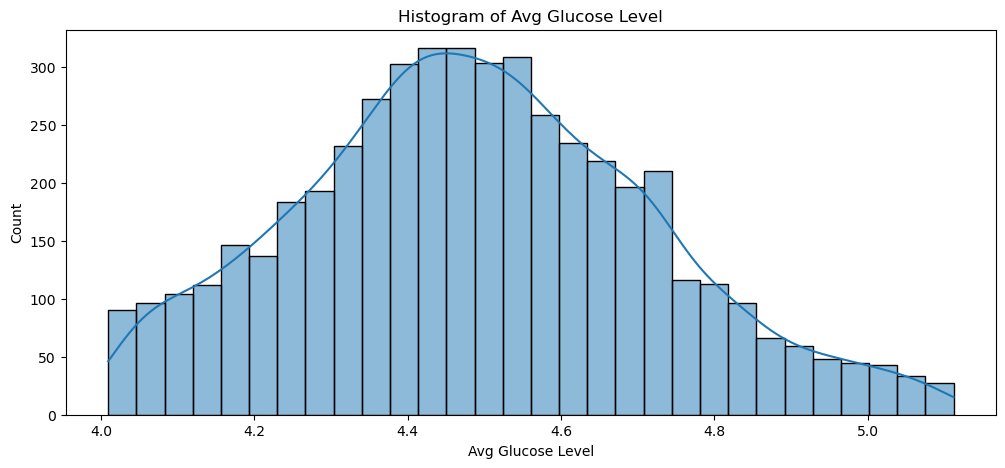

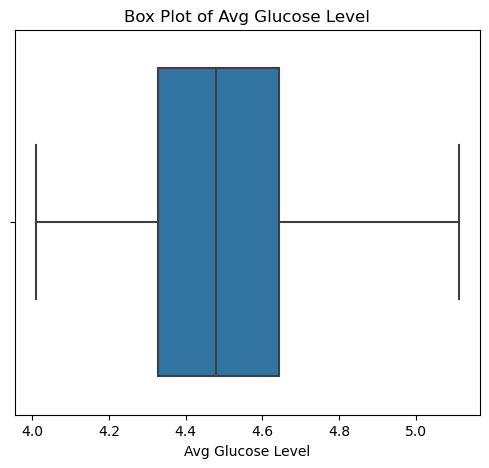

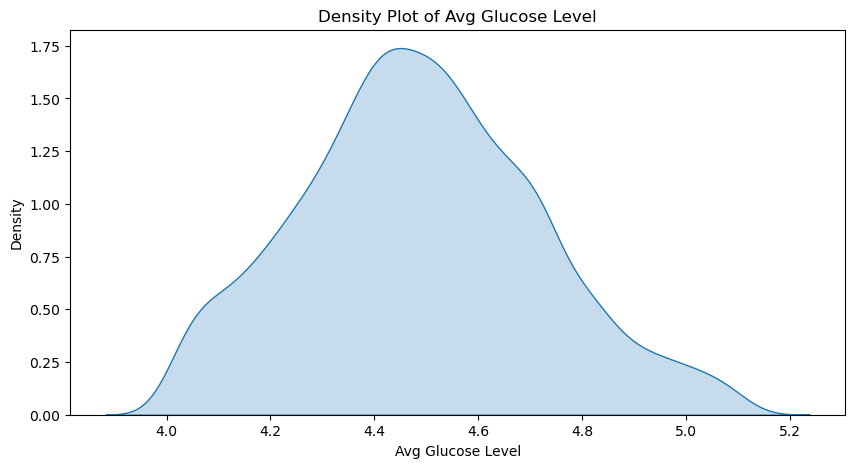

In [41]:
# Summary statistics for avg_glucose_level
print("Summary statistics for avg_glucose_level:")
print(df['avg_glucose_level'].describe())

# Histogram for avg_glucose_level
plt.figure(figsize=(12, 5))
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Histogram of Avg Glucose Level')
plt.xlabel('Avg Glucose Level')
plt.show()

# Box Plot for avg_glucose_level
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Box Plot of Avg Glucose Level')
plt.xlabel('Avg Glucose Level')
plt.show()

# Density Plot for avg_glucose_level
plt.figure(figsize=(10, 5))
sns.kdeplot(df['avg_glucose_level'], fill=True)
plt.title('Density Plot of Avg Glucose Level')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Density')
plt.show()


Summary statistics for bmi:
count    4873.000000
mean       28.217669
std         6.651141
min        10.300000
25%        23.500000
50%        28.000000
75%        32.400000
max        45.700000
Name: bmi, dtype: float64


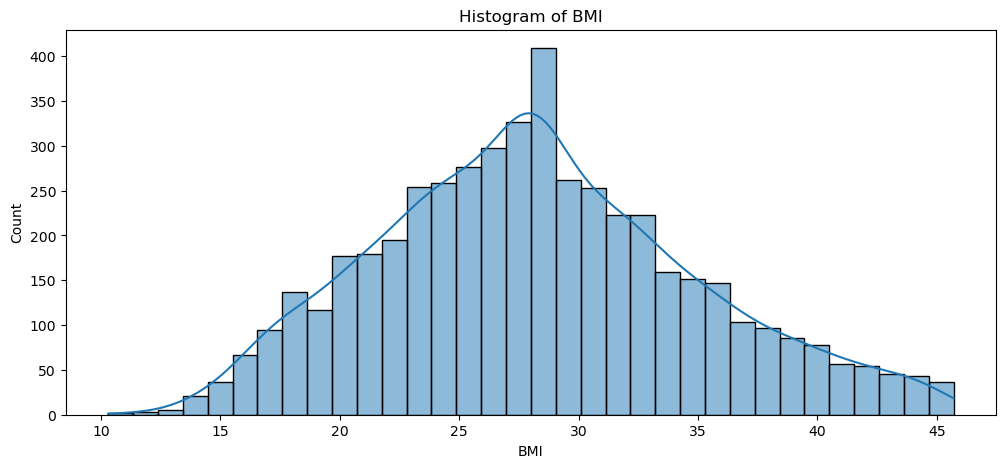

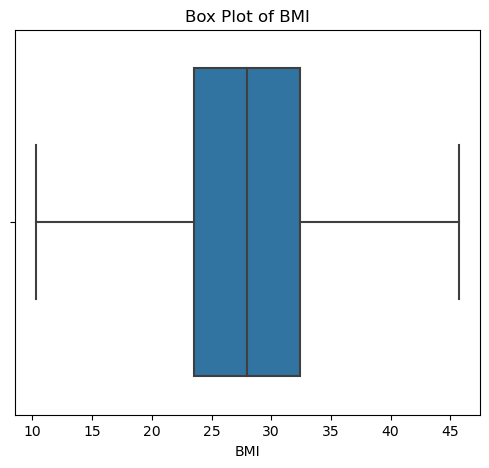

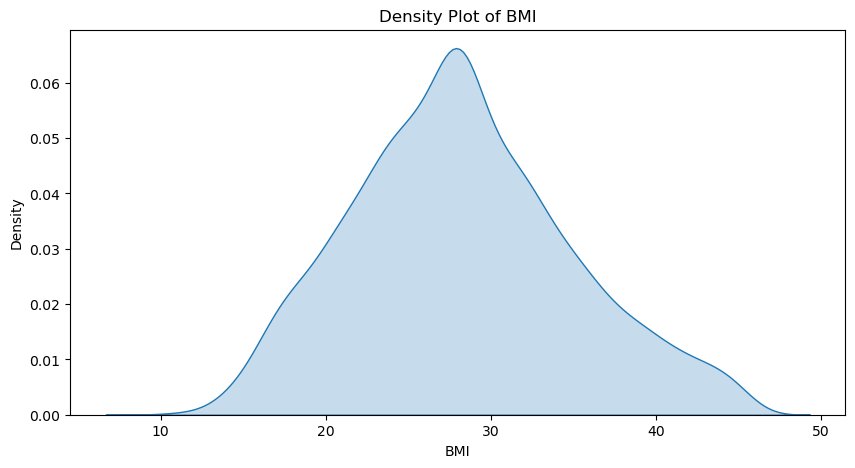

In [42]:
# Summary statistics for bmi
print("Summary statistics for bmi:")
print(df['bmi'].describe())

# Histogram for bmi
plt.figure(figsize=(12, 5))
sns.histplot(df['bmi'], kde=True)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.show()

# Box Plot for bmi
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()

# Density Plot for bmi
plt.figure(figsize=(10, 5))
sns.kdeplot(df['bmi'], fill=True)
plt.title('Density Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


# Categorical Variables

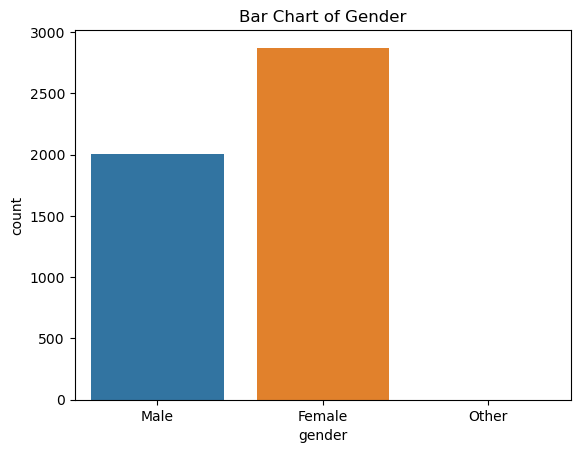

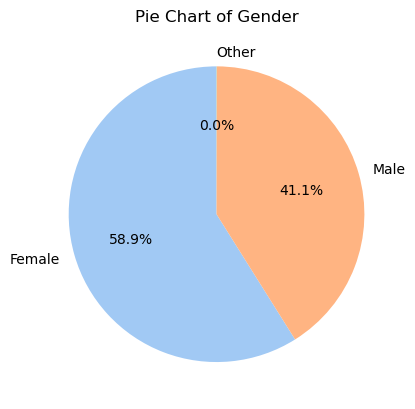

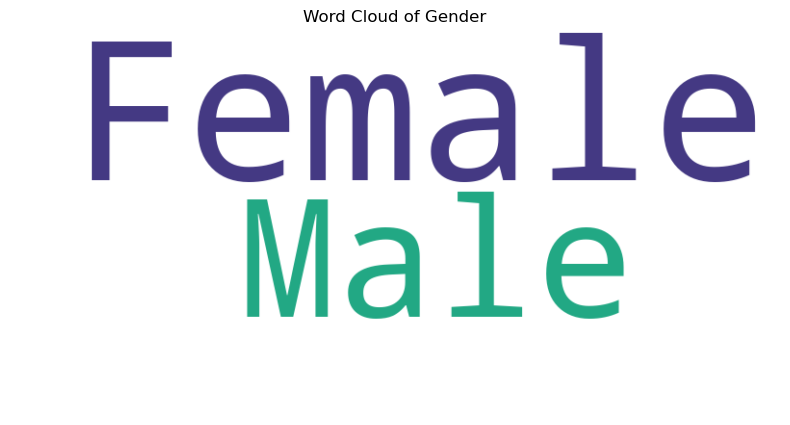

In [44]:
from wordcloud import WordCloud

# Bar Chart for gender
sns.countplot(x='gender', data=df)
plt.title('Bar Chart of Gender')
plt.show()

# Pie Chart for gender
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Gender')
plt.ylabel('')
plt.show()

# Word Cloud for gender
gender_text = ' '.join(df['gender'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(gender_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Gender')
plt.show()


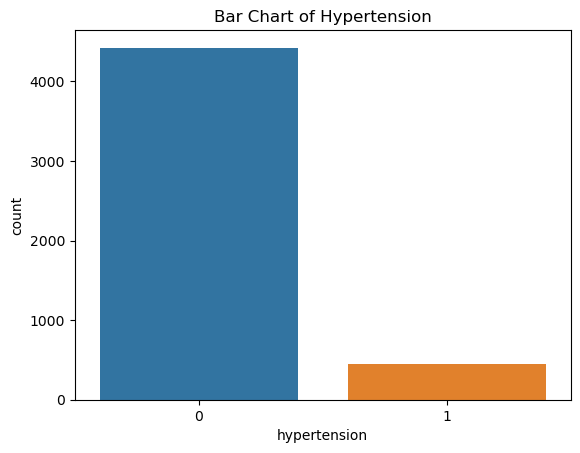

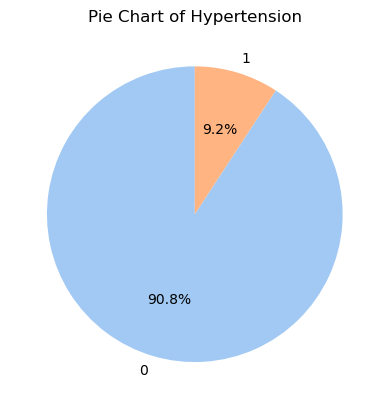

In [45]:
# Bar Chart for hypertension
sns.countplot(x='hypertension', data=df)
plt.title('Bar Chart of Hypertension')
plt.show()

# Pie Chart for hypertension
df['hypertension'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Hypertension')
plt.ylabel('')
plt.show()


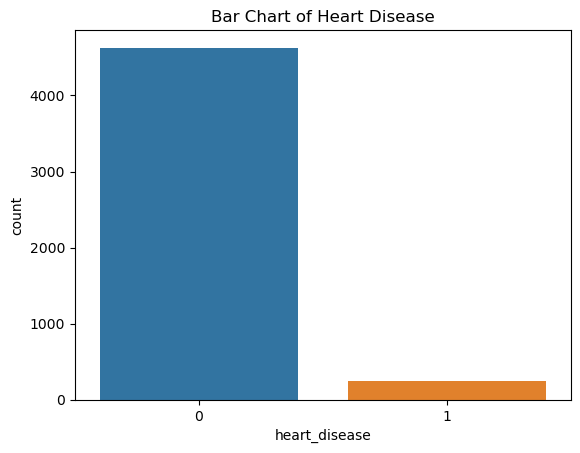

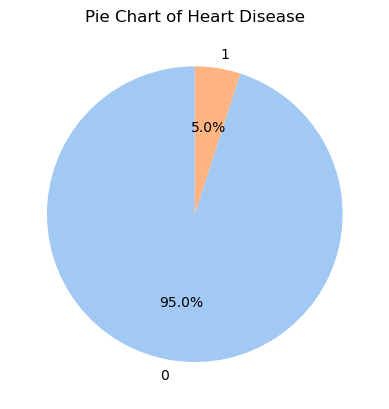

In [46]:
# Bar Chart for heart_disease
sns.countplot(x='heart_disease', data=df)
plt.title('Bar Chart of Heart Disease')
plt.show()

# Pie Chart for heart_disease
df['heart_disease'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Heart Disease')
plt.ylabel('')
plt.show()


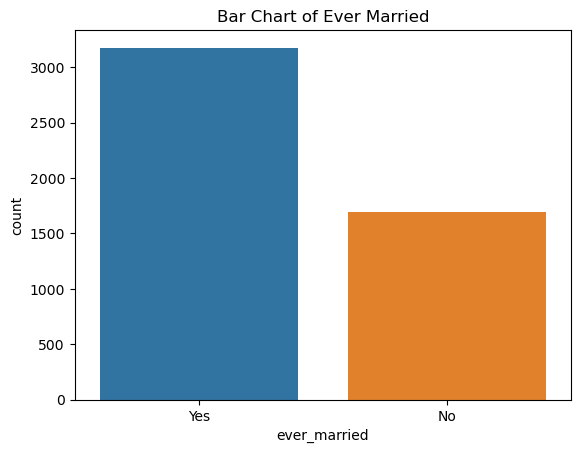

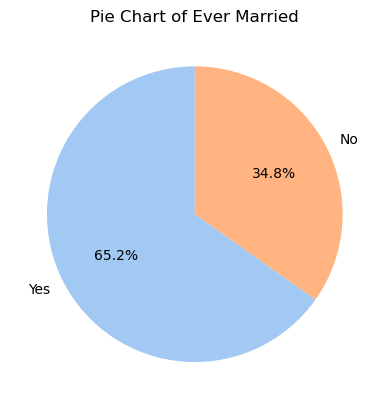

In [47]:
# Bar Chart for ever_married
sns.countplot(x='ever_married', data=df)
plt.title('Bar Chart of Ever Married')
plt.show()

# Pie Chart for ever_married
df['ever_married'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Ever Married')
plt.ylabel('')
plt.show()


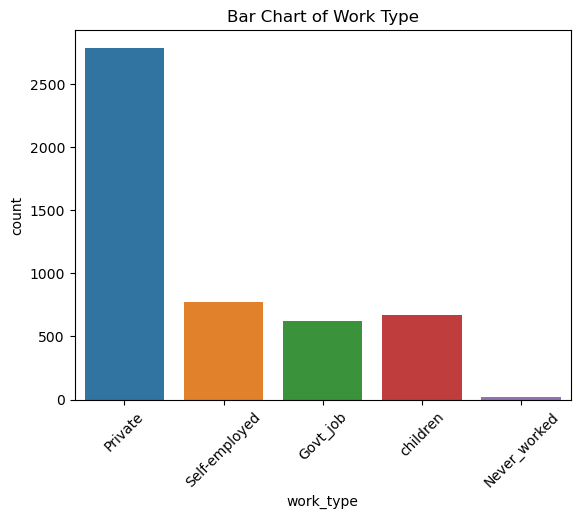

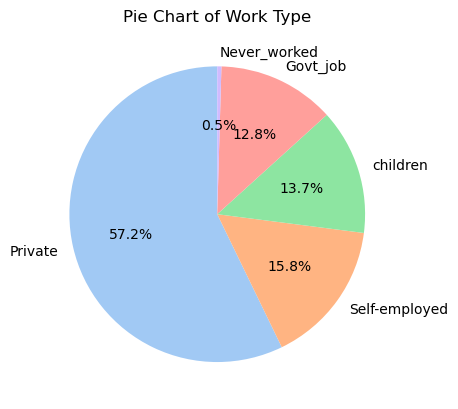

In [48]:
# Bar Chart for work_type
sns.countplot(x='work_type', data=df)
plt.title('Bar Chart of Work Type')
plt.xticks(rotation=45)
plt.show()

# Pie Chart for work_type
df['work_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Work Type')
plt.ylabel('')
plt.show()


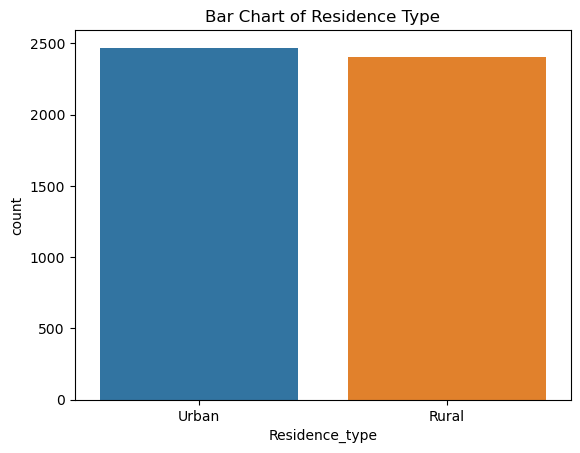

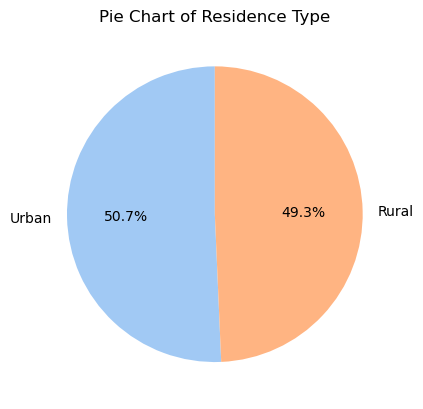

In [49]:
# Bar Chart for Residence_type
sns.countplot(x='Residence_type', data=df)
plt.title('Bar Chart of Residence Type')
plt.show()

# Pie Chart for Residence_type
df['Residence_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Residence Type')
plt.ylabel('')
plt.show()


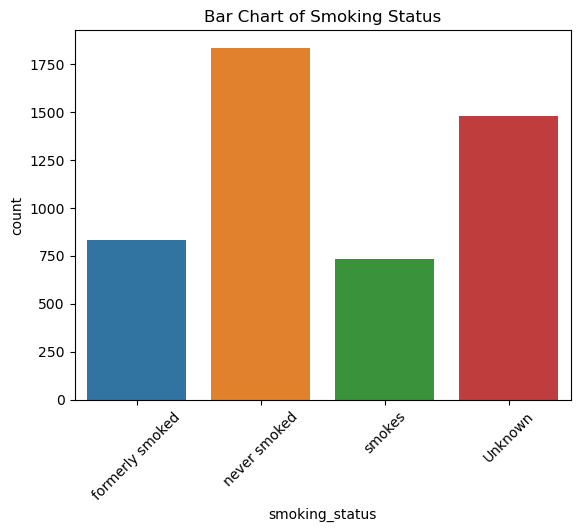

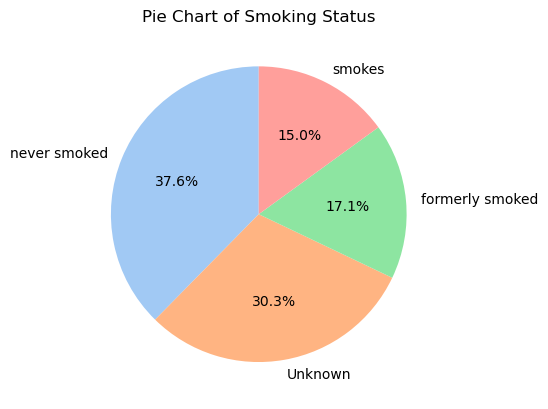

In [50]:
# Bar Chart for smoking_status
sns.countplot(x='smoking_status', data=df)
plt.title('Bar Chart of Smoking Status')
plt.xticks(rotation=45)
plt.show()

# Pie Chart for smoking_status
df['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Smoking Status')
plt.ylabel('')
plt.show()



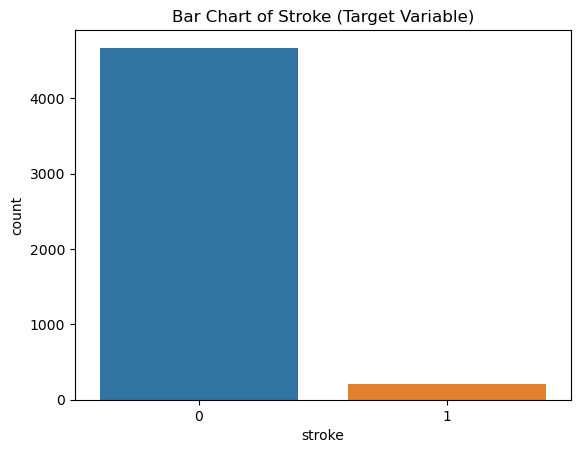

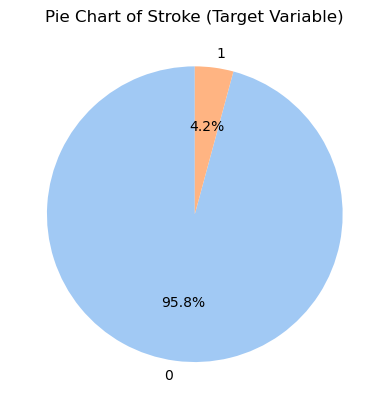

In [51]:
# Bar Chart for stroke
sns.countplot(x='stroke', data=df)
plt.title('Bar Chart of Stroke (Target Variable)')
plt.show()

# Pie Chart for stroke
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Pie Chart of Stroke (Target Variable)')
plt.ylabel('')
plt.show()


# Bivariate Analysis

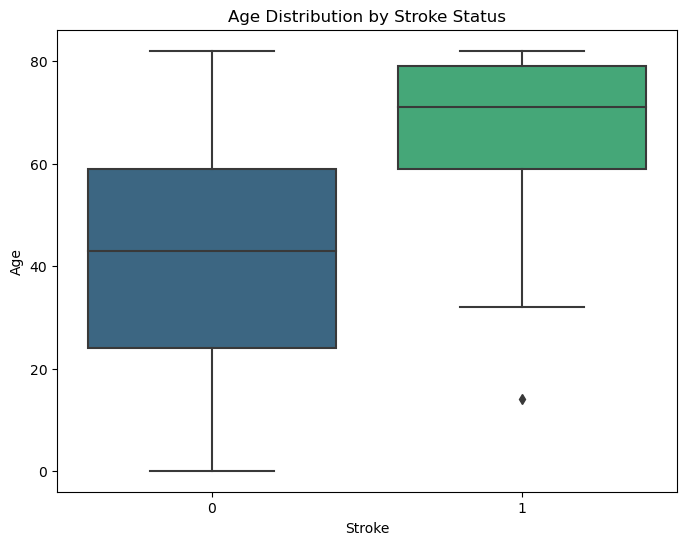

In [52]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='age', palette='viridis')
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()


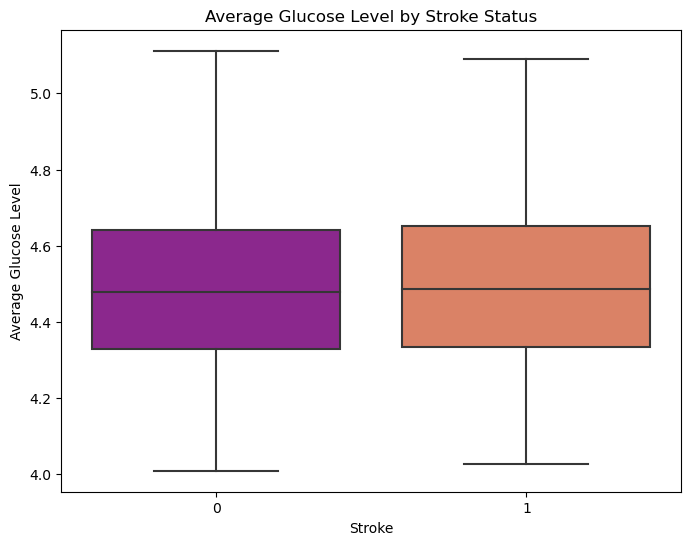

In [53]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='plasma')
plt.title('Average Glucose Level by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()


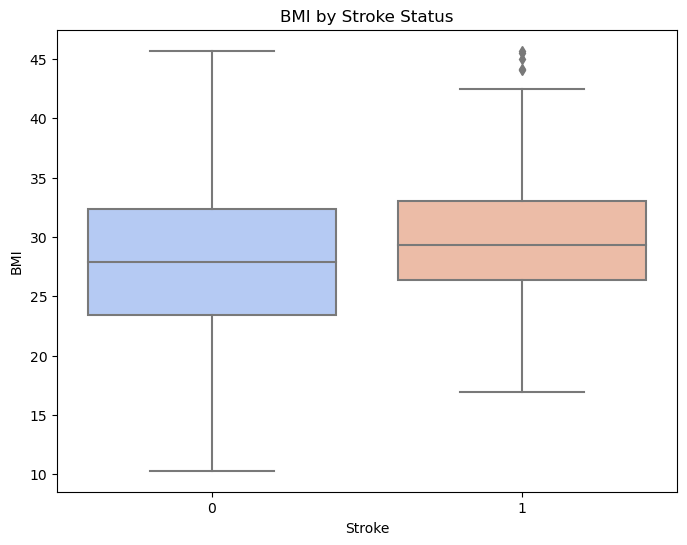

In [54]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='bmi', palette='coolwarm')
plt.title('BMI by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()


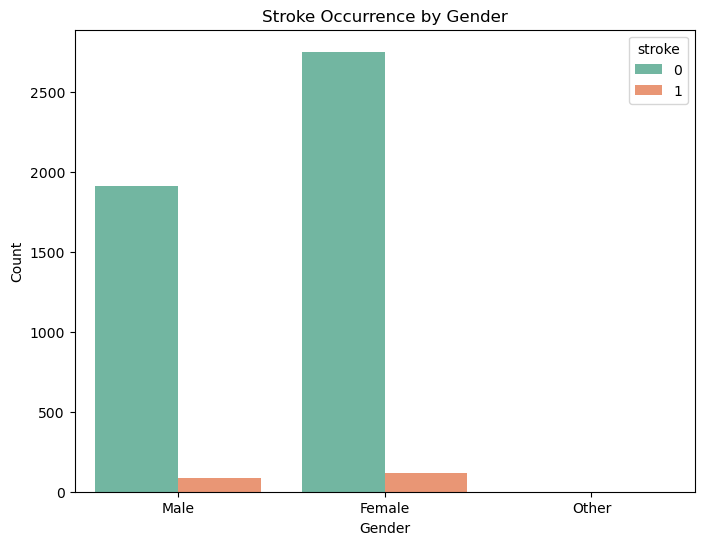

In [55]:
# Grouped Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='stroke', palette='Set2')
plt.title('Stroke Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


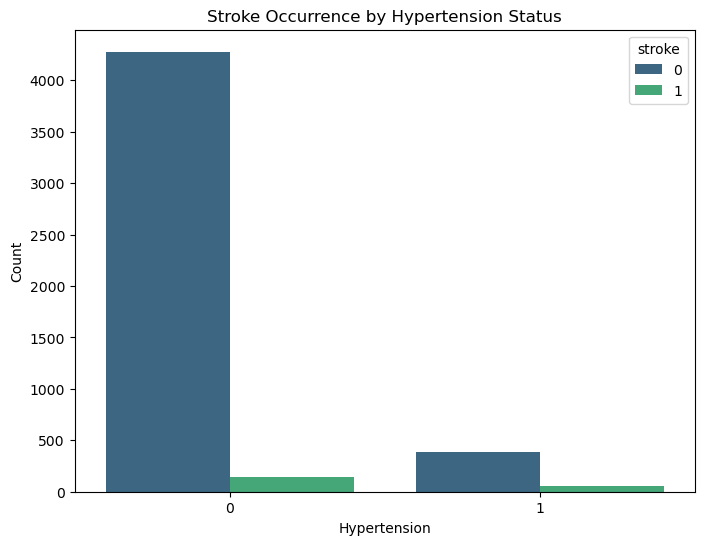

In [56]:
# Grouped Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hypertension', hue='stroke', palette='viridis')
plt.title('Stroke Occurrence by Hypertension Status')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()


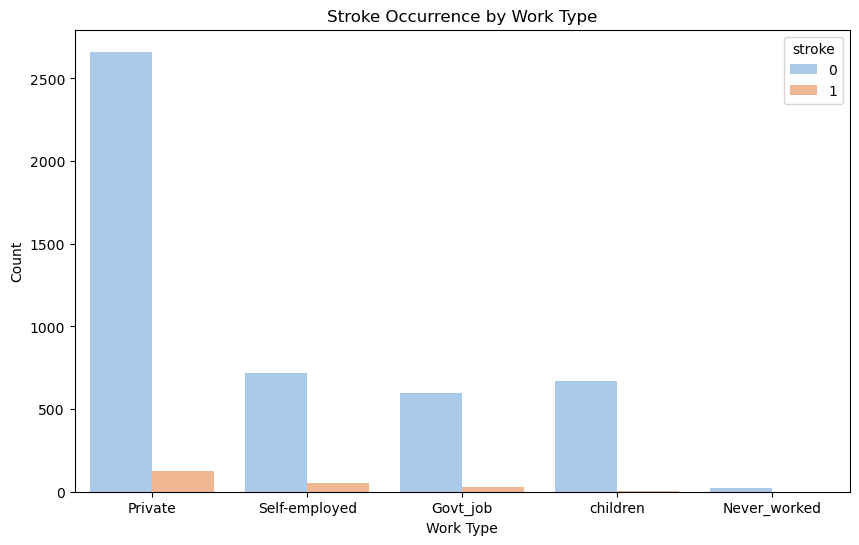

In [57]:
# Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='stroke', palette='pastel')
plt.title('Stroke Occurrence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()


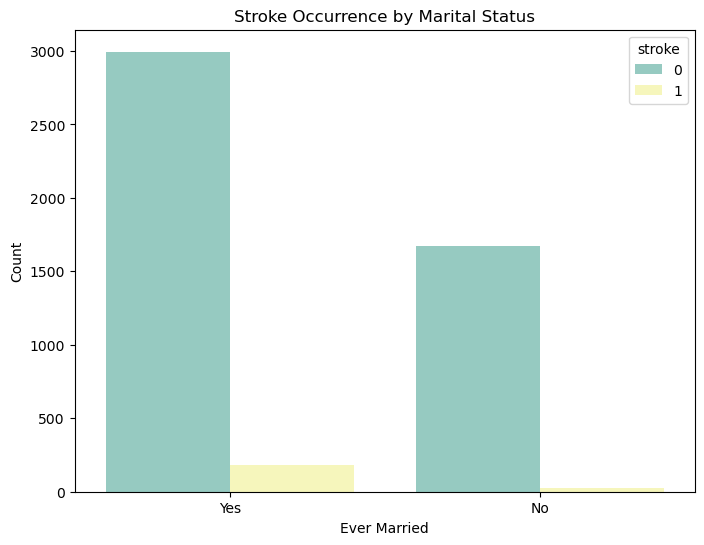

In [58]:
# Grouped Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ever_married', hue='stroke', palette='Set3')
plt.title('Stroke Occurrence by Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.show()


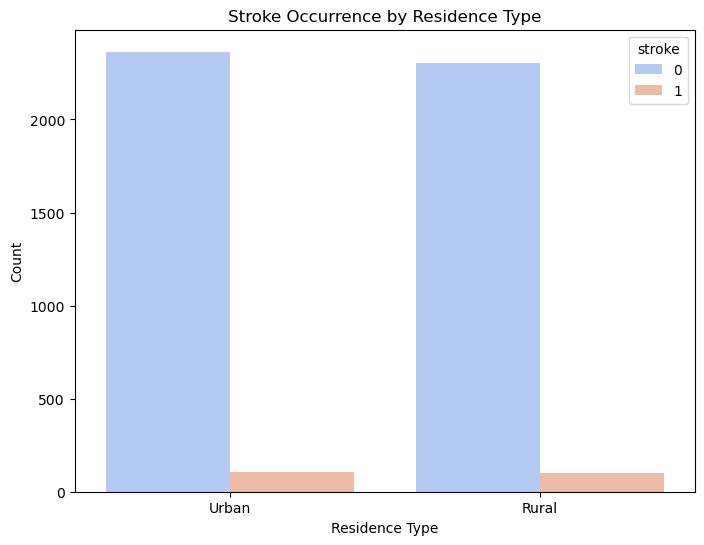

In [59]:
# Grouped Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Residence_type', hue='stroke', palette='coolwarm')
plt.title('Stroke Occurrence by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()


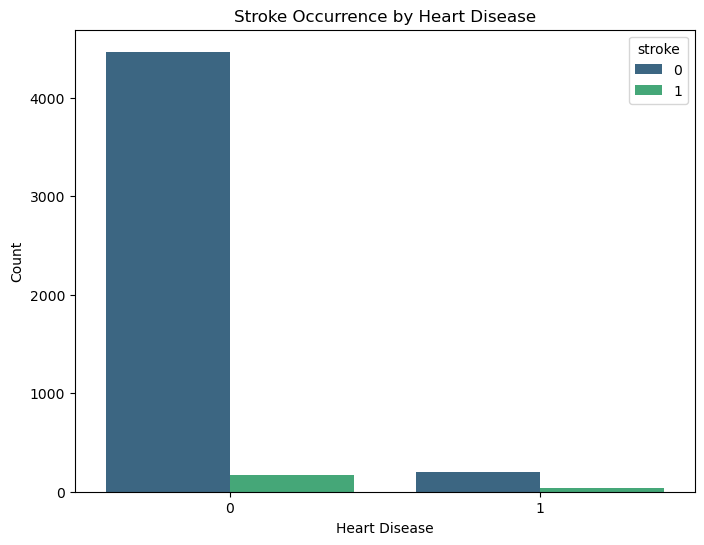

In [60]:
# Grouped Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='heart_disease', hue='stroke', palette='viridis')
plt.title('Stroke Occurrence by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


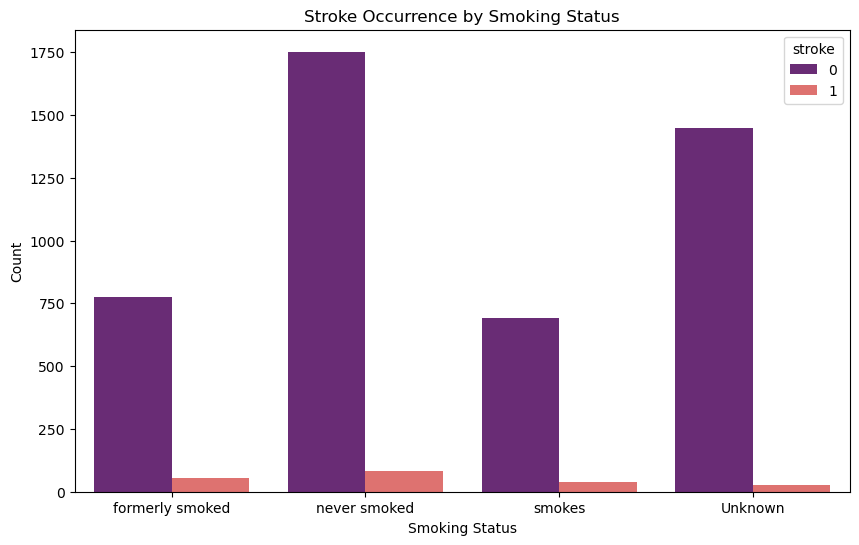

In [61]:
# Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette='magma')
plt.title('Stroke Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


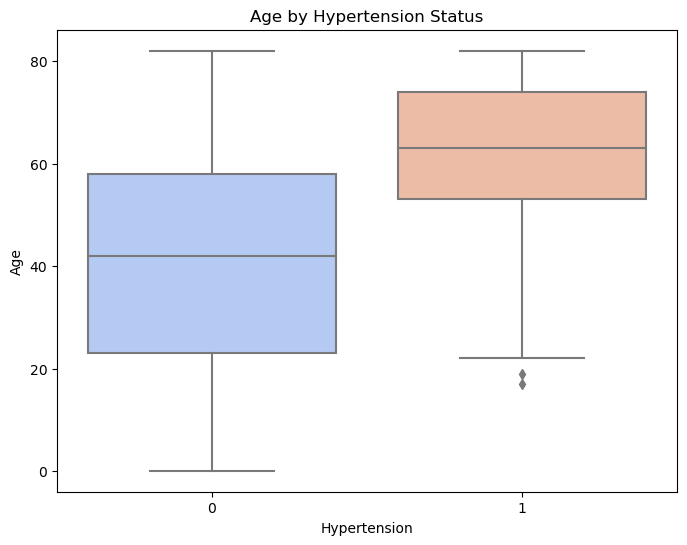

In [62]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='hypertension', y='age', palette='coolwarm')
plt.title('Age by Hypertension Status')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.show()


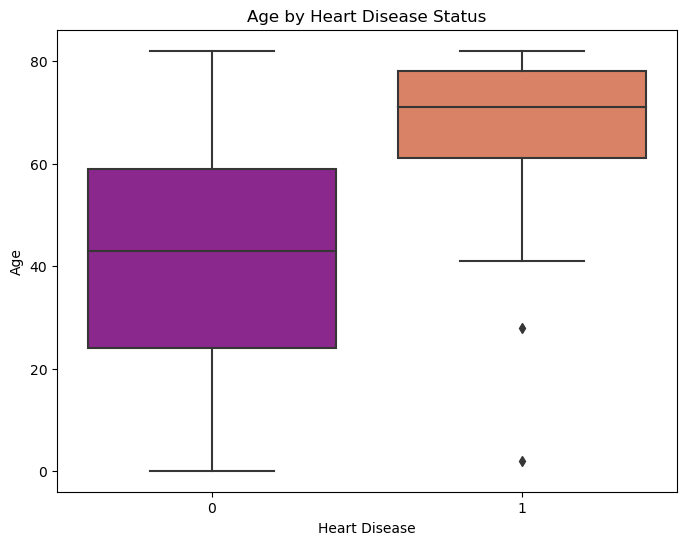

In [63]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='heart_disease', y='age', palette='plasma')
plt.title('Age by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


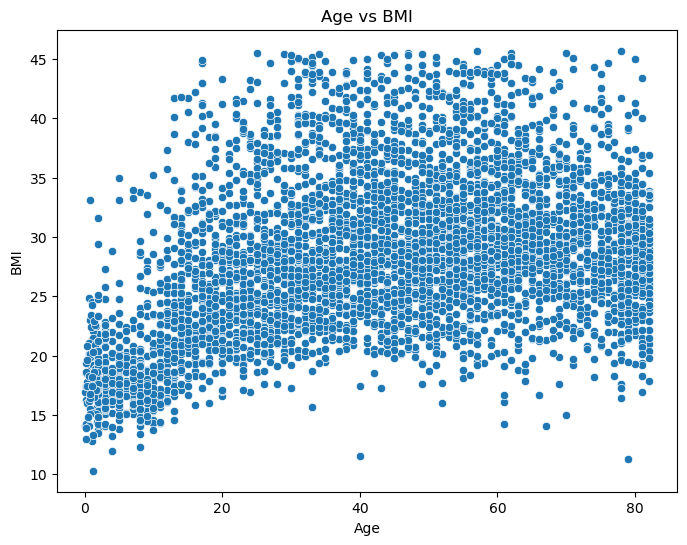

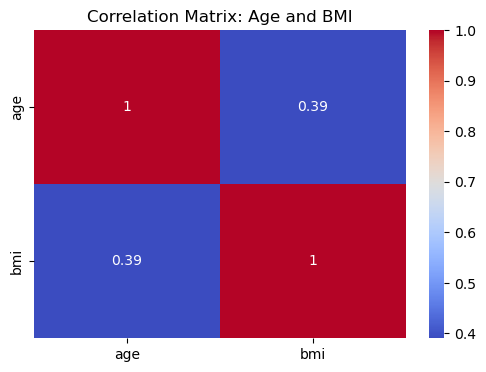

In [64]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='bmi')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['age', 'bmi']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Age and BMI')
plt.show()


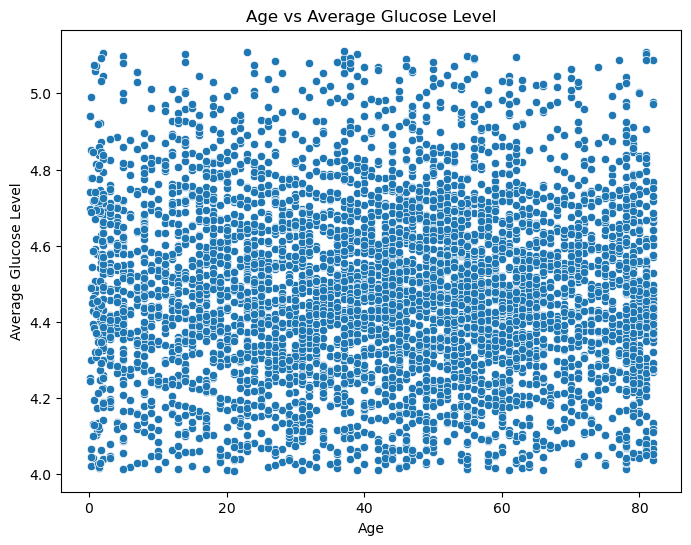

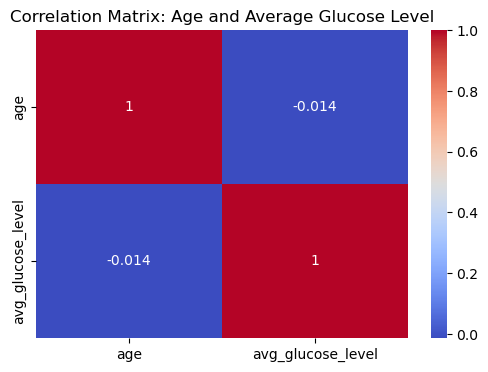

In [65]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level')
plt.title('Age vs Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['age', 'avg_glucose_level']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Age and Average Glucose Level')
plt.show()


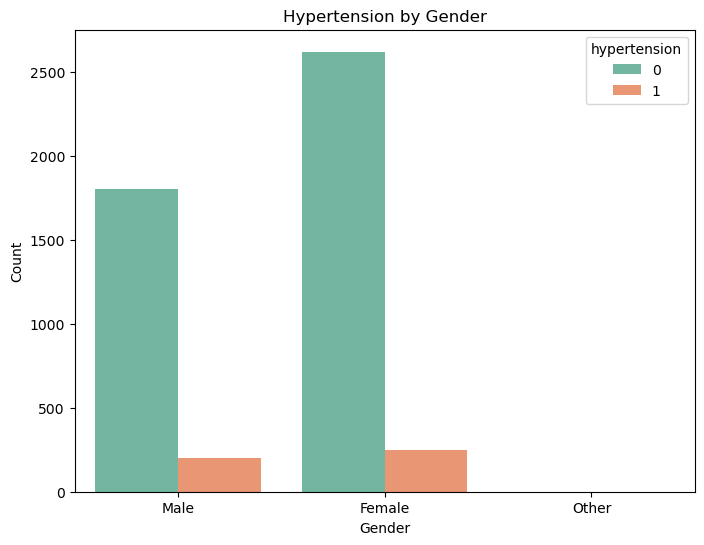

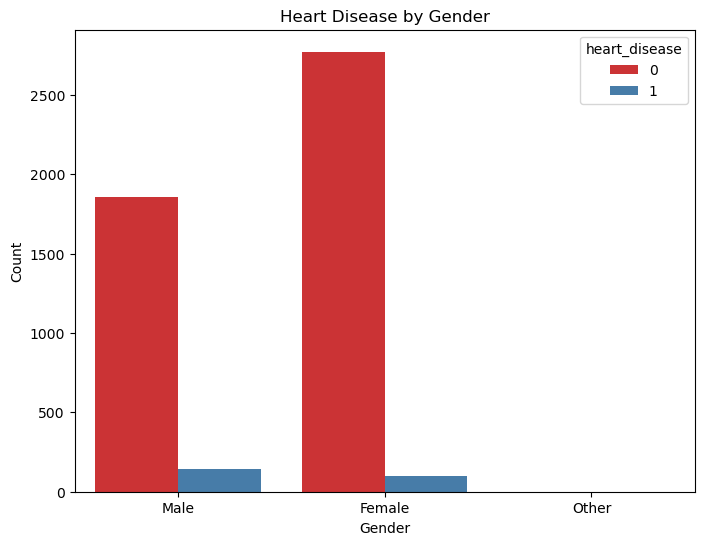

In [66]:
# Grouped Bar Chart (Gender and Hypertension)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='hypertension', palette='Set2')
plt.title('Hypertension by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Grouped Bar Chart (Gender and Heart Disease)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='heart_disease', palette='Set1')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


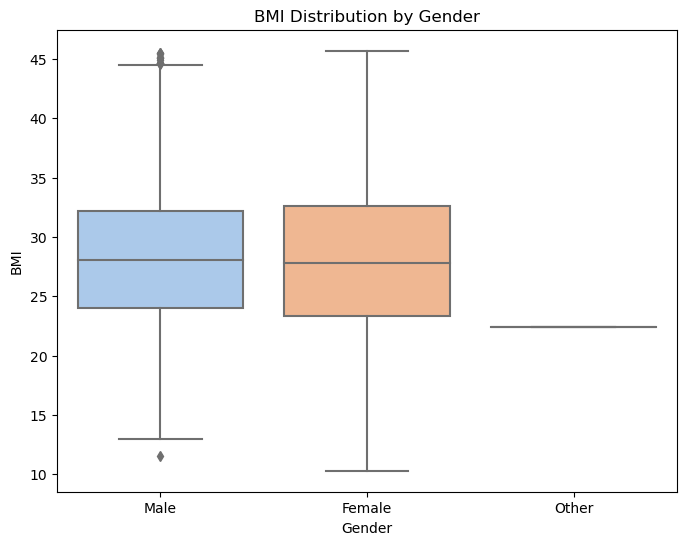

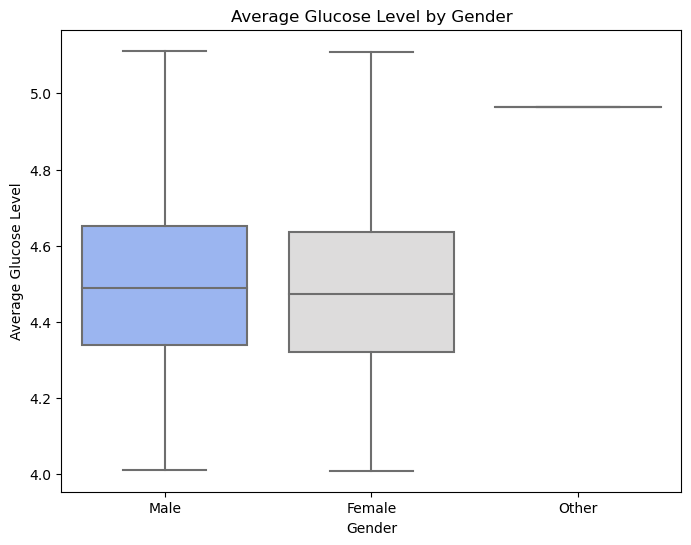

In [67]:
# Box Plot (Gender and BMI)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='bmi', palette='pastel')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

# Box Plot (Gender and Average Glucose Level)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='avg_glucose_level', palette='coolwarm')
plt.title('Average Glucose Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Glucose Level')
plt.show()


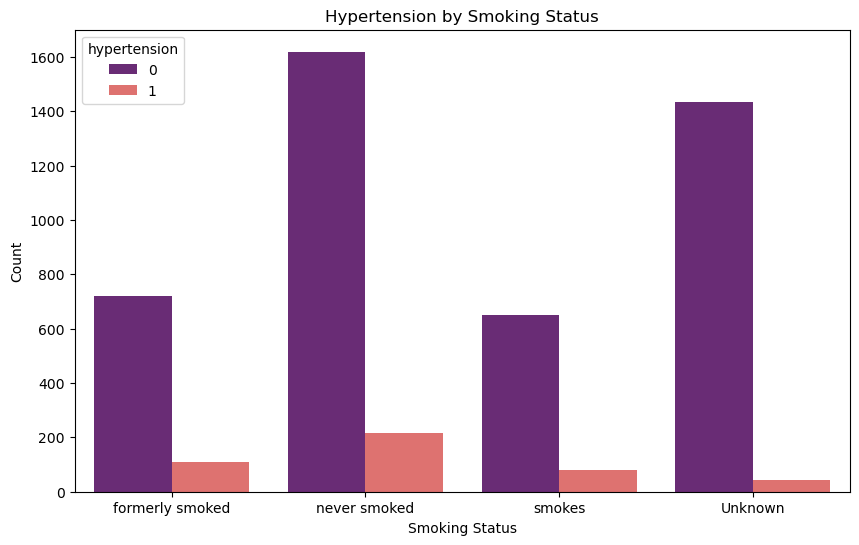

In [68]:
# Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='hypertension', palette='magma')
plt.title('Hypertension by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


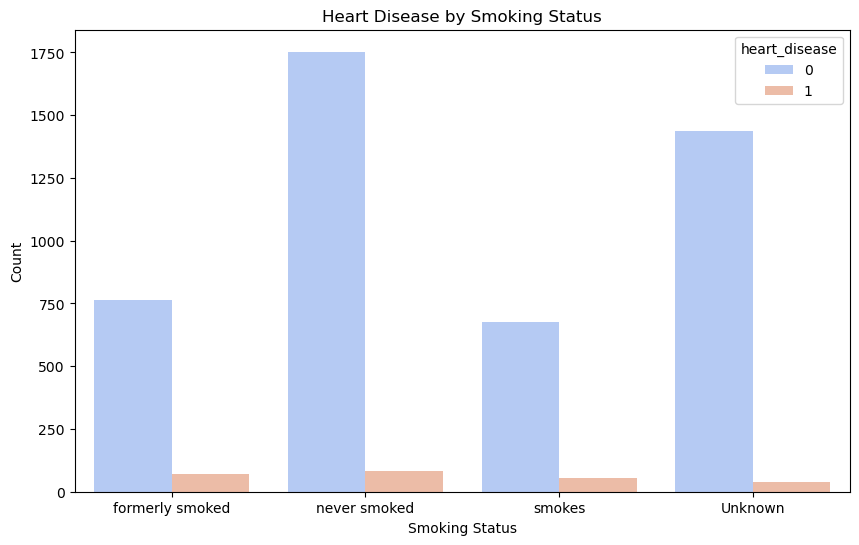

In [69]:
# Grouped Bar Chart (Smoking Status and Heart Disease)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='heart_disease', palette='coolwarm')
plt.title('Heart Disease by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


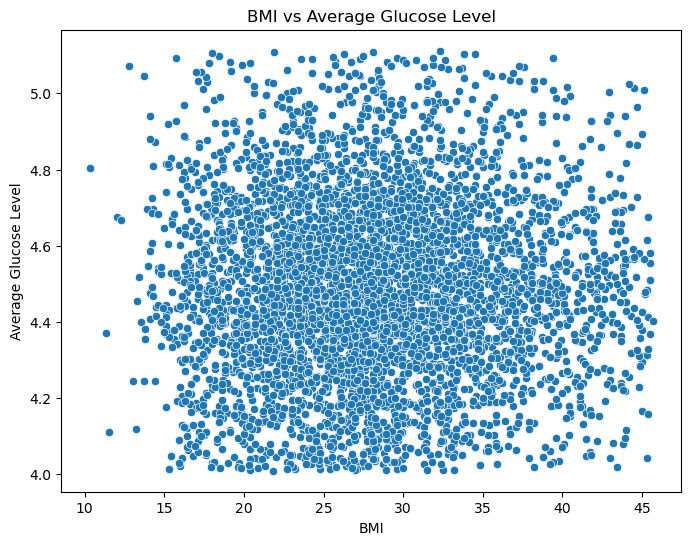

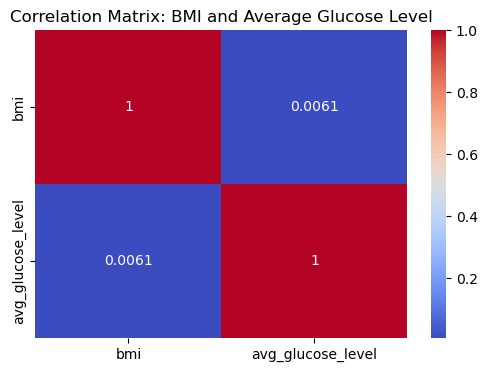

In [70]:
# Scatter Plot (BMI and Average Glucose Level)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level')
plt.title('BMI vs Average Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.show()

# Correlation Matrix (BMI and Average Glucose Level)
plt.figure(figsize=(6, 4))
sns.heatmap(df[['bmi', 'avg_glucose_level']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: BMI and Average Glucose Level')
plt.show()


# Multivariate Analysis

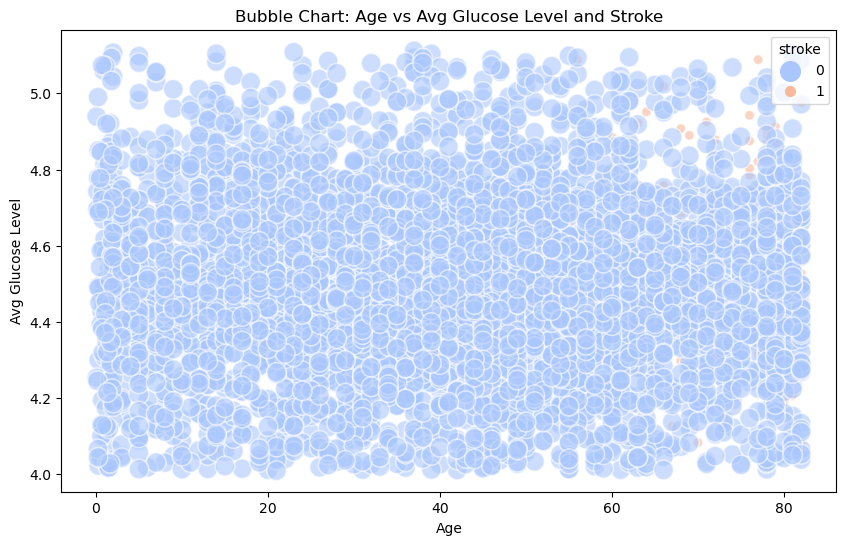

In [71]:
# Bubble Chart: Age vs Avg Glucose Level with Stroke as size and color
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', size='stroke', sizes=(50, 200), palette='coolwarm', alpha=0.6)
plt.title('Bubble Chart: Age vs Avg Glucose Level and Stroke')
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.show()


In [88]:
import warnings

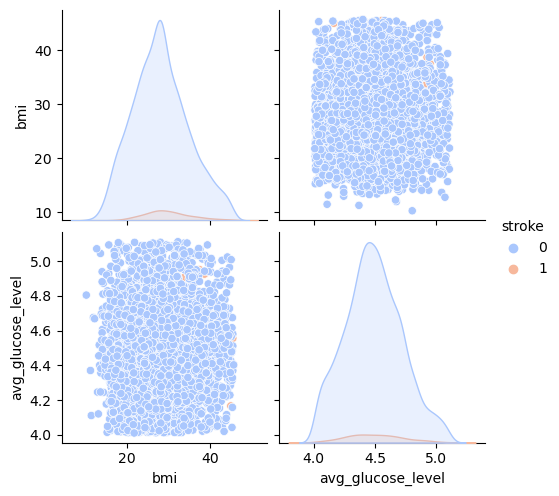

In [89]:
# Pair Plot: BMI, Avg Glucose Level, and Stroke

# suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Pair Plot: BMI, Avg Glucose Level, and Stroke
    sns.pairplot(df[['bmi', 'avg_glucose_level', 'stroke']], hue='stroke', palette='coolwarm')
    plt.show()


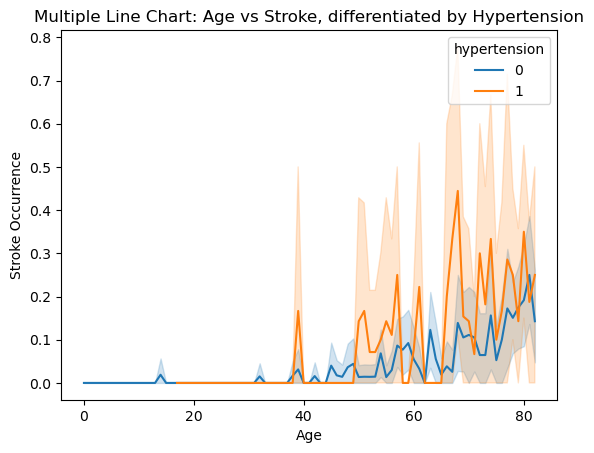

In [73]:
# Multiple Line Chart: Age vs Stroke, differentiated by Hypertension status
sns.lineplot(data=df, x='age', y='stroke', hue='hypertension', markers=True, dashes=False)
plt.title('Multiple Line Chart: Age vs Stroke, differentiated by Hypertension')
plt.xlabel('Age')
plt.ylabel('Stroke Occurrence')
plt.show()

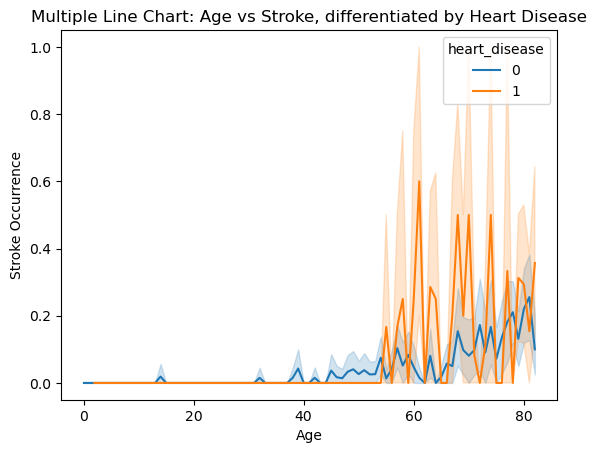

In [74]:
# Multiple Line Chart: Age vs Stroke, differentiated by Heart Disease status
sns.lineplot(data=df, x='age', y='stroke', hue='heart_disease', markers=True, dashes=False)
plt.title('Multiple Line Chart: Age vs Stroke, differentiated by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Stroke Occurrence')
plt.show()

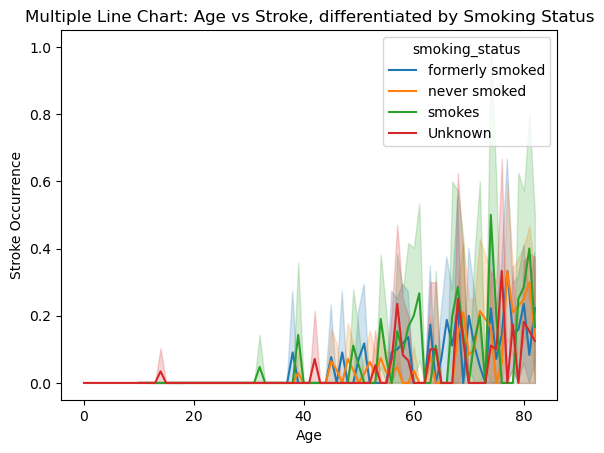

In [75]:
# Multiple Line Chart: Age vs Stroke, differentiated by Smoking Status
sns.lineplot(data=df, x='age', y='stroke', hue='smoking_status', markers=True, dashes=False)
plt.title('Multiple Line Chart: Age vs Stroke, differentiated by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Stroke Occurrence')
plt.show()


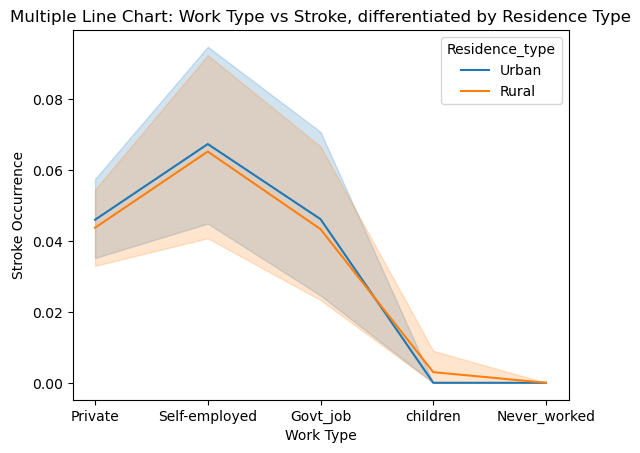

In [76]:
# Multiple Line Chart: Work Type vs Stroke, differentiated by Residence Type
sns.lineplot(data=df, x='work_type', y='stroke', hue='Residence_type', markers=True, dashes=False)
plt.title('Multiple Line Chart: Work Type vs Stroke, differentiated by Residence Type')
plt.xlabel('Work Type')
plt.ylabel('Stroke Occurrence')
plt.show()

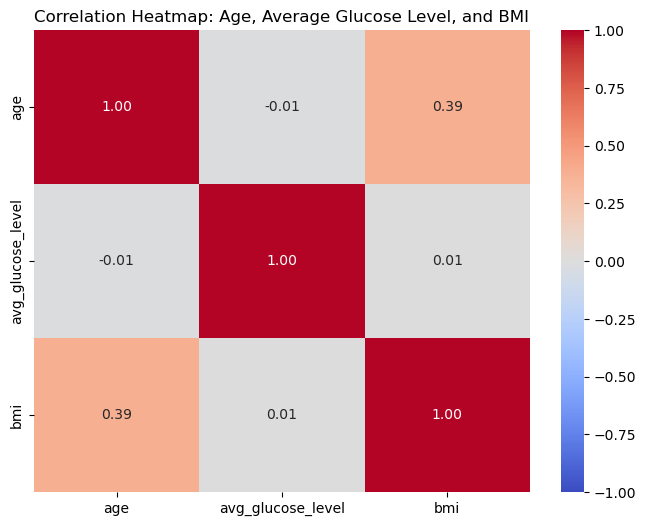

In [77]:
numeric_columns_all = ['age', 'avg_glucose_level', 'bmi']

# 4. Correlation Heatmap for Age, Average Glucose Level, and BMI
corr_matrix_all = df[numeric_columns_all].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Age, Average Glucose Level, and BMI')
plt.show()


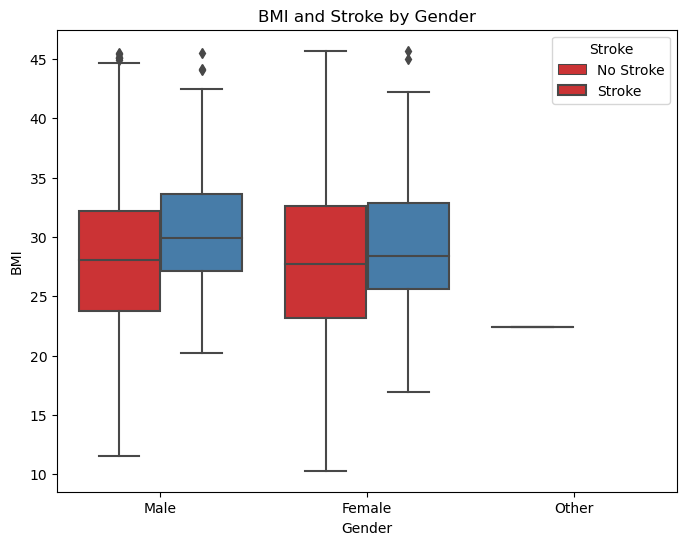

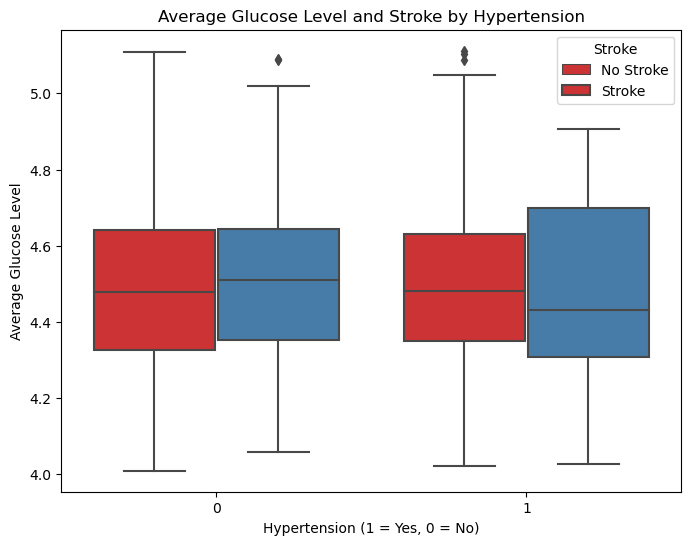

In [78]:
# 1. Box Plot for BMI and Stroke by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='bmi', hue='stroke', palette='Set1')
plt.title('BMI and Stroke by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

# 2. Box Plot for Average Glucose Level and Stroke by Hypertension
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='hypertension', y='avg_glucose_level', hue='stroke', palette='Set1')
plt.title('Average Glucose Level and Stroke by Hypertension')
plt.xlabel('Hypertension (1 = Yes, 0 = No)')
plt.ylabel('Average Glucose Level')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()


# Descriptive Analysis

# 1) What is the distribution of residence types (Urban vs. Rural)?

In [90]:
residence_distribution = df['Residence_type'].value_counts()
print("Distribution of residence types (Urban vs. Rural):\n", residence_distribution)

Distribution of residence types (Urban vs. Rural):
 Residence_type
Urban    2470
Rural    2403
Name: count, dtype: int64


# 2) What is the average BMI of patients who experienced a stroke compared to those who didn’t?

In [91]:
average_bmi_by_stroke = df.groupby('stroke')['bmi'].mean()
print("Average BMI of patients who experienced a stroke compared to those who didn’t:\n", average_bmi_by_stroke)

Average BMI of patients who experienced a stroke compared to those who didn’t:
 stroke
0    28.139632
1    29.994634
Name: bmi, dtype: float64


# 3) How do hypertension prevalence differ among genders?

In [92]:
hypertension_by_gender = pd.crosstab(df['gender'], df['hypertension'])
print("Hypertension prevalence by gender (%):\n", hypertension_by_gender)

Hypertension prevalence by gender (%):
 hypertension     0    1
gender                 
Female        2621  250
Male          1802  199
Other            1    0


# 4) Which work type has the highest occurrence of stroke?

In [93]:
stroke_by_work_type = pd.crosstab(df['work_type'], df['stroke'])

work_type_with_highest_stroke = stroke_by_work_type[1].idxmax()
print("Work type with the highest occurrence of stroke:", work_type_with_highest_stroke)

Work type with the highest occurrence of stroke: Private


# 5) For patients with heart disease, what is the average age and BMI?

In [94]:
heart_disease_avg = df[df['heart_disease'] == 1][['age', 'bmi']].mean()
print("Average age and BMI for patients with heart disease:\n", heart_disease_avg)

Average age and BMI for patients with heart disease:
 age    68.275720
bmi    30.206996
dtype: float64


# 6) How does marital status correlate with stroke occurrence across different work types?

In [95]:
marital_status_work_stroke = pd.crosstab(
    [df['ever_married'], df['work_type']], 
    df['stroke'])

print("Correlation of marital status with stroke occurrence across different work types:\n", marital_status_work_stroke)

Correlation of marital status with stroke occurrence across different work types:
 stroke                         0    1
ever_married work_type               
No           Govt_job        105    5
             Never_worked     22    0
             Private         777   12
             Self-employed   100    5
             children        669    1
Yes          Govt_job        492   23
             Private        1885  113
             Self-employed   618   46


# 7) What is the distribution of stroke occurrences across genders?

In [96]:
stroke_distribution_by_gender = pd.crosstab(df['gender'], df['stroke'])
print("Distribution of stroke occurrences across genders:\n", stroke_distribution_by_gender)

Distribution of stroke occurrences across genders:
 stroke     0    1
gender           
Female  2754  117
Male    1913   88
Other      1    0


# 8) What is the correlation between average glucose level, BMI, age, and stroke occurrence?

In [97]:
correlation_data = df[['avg_glucose_level', 'bmi', 'age', 'stroke']]

correlation_matrix = correlation_data.corr()
print("Correlation matrix between avg_glucose_level, BMI, age, and stroke occurrence:\n", correlation_matrix)


Correlation matrix between avg_glucose_level, BMI, age, and stroke occurrence:
                    avg_glucose_level       bmi       age    stroke
avg_glucose_level           1.000000  0.006053 -0.013543  0.009842
bmi                         0.006053  1.000000  0.390506  0.055994
age                        -0.013543  0.390506  1.000000  0.232465
stroke                      0.009842  0.055994  0.232465  1.000000


# Data Transformation

In [36]:
# Datatypes

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [37]:
# Converting datatypes of categorical variables to category

df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']] = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']].astype('category')

In [38]:
# Converting datatype of 'age' to int
df['age'] = df['age'].astype('int64')

In [39]:
# Datatypes

df.dtypes

id                      int64
gender               category
age                     int64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object

In [40]:
# Finding number of unique values in each attribute

df.nunique()

id                   4873
gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3704
bmi                   329
smoking_status          4
stroke                  2
dtype: int64

In [41]:
# one-hot encoding

# get_dummies for categorical attributes with more than 2 unique values
df = pd.get_dummies(df, columns = ['gender', 'work_type', 'smoking_status'], dtype=int)

# .cat.codes for categorical attributes with 2 unique values
df['ever_married'] = df['ever_married'].cat.codes
df['Residence_type'] = df['Residence_type'].cat.codes


In [42]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,1,1,4.662684,36.6,1,0,...,0,0,0,1,0,0,0,1,0,0
2,31112,80,0,1,1,0,4.662684,32.5,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49,0,0,1,1,4.574324,34.4,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79,1,0,1,0,4.477394,24.0,1,1,...,0,0,0,0,1,0,0,0,1,0
5,56669,81,0,0,1,1,4.370049,29.0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [43]:
# Datatypes

df.dtypes

id                                   int64
age                                  int64
hypertension                      category
heart_disease                     category
ever_married                          int8
Residence_type                        int8
avg_glucose_level                  float64
bmi                                float64
stroke                            category
gender_Female                        int32
gender_Male                          int32
gender_Other                         int32
work_type_Govt_job                   int32
work_type_Never_worked               int32
work_type_Private                    int32
work_type_Self-employed              int32
work_type_children                   int32
smoking_status_Unknown               int32
smoking_status_formerly smoked       int32
smoking_status_never smoked          int32
smoking_status_smokes                int32
dtype: object

In [44]:
# Converting datatype of dummy columns to category

for col in df.columns:
    if df[col].nunique() == 2:
        df[col] = df[col].astype('category')

In [45]:
# Datatypes

df.dtypes

id                                   int64
age                                  int64
hypertension                      category
heart_disease                     category
ever_married                      category
Residence_type                    category
avg_glucose_level                  float64
bmi                                float64
stroke                            category
gender_Female                     category
gender_Male                       category
gender_Other                      category
work_type_Govt_job                category
work_type_Never_worked            category
work_type_Private                 category
work_type_Self-employed           category
work_type_children                category
smoking_status_Unknown            category
smoking_status_formerly smoked    category
smoking_status_never smoked       category
smoking_status_smokes             category
dtype: object

In [46]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,1,1,4.662684,36.6,1,0,...,0,0,0,1,0,0,0,1,0,0
2,31112,80,0,1,1,0,4.662684,32.5,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49,0,0,1,1,4.574324,34.4,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79,1,0,1,0,4.477394,24.0,1,1,...,0,0,0,0,1,0,0,0,1,0
5,56669,81,0,0,1,1,4.370049,29.0,1,0,...,0,0,0,1,0,0,0,1,0,0


# Data Validation

In [47]:
# 1. Accuracy
# Check for invalid ages
invalid_ages = df[df['age'] < 0]
print(f"Invalid Ages: {len(invalid_ages)} enteries")

# Check for invalid bmi
invalid_bmi = df[(df['bmi'] < 10) | (df['bmi'] > 50)]
print(f"\nInvalid BMI: {len(invalid_bmi)} enteries")

# Check for invalid glucose level
invalid_glucose = df[(df['avg_glucose_level'] < 0)]
print(f"\nInvalid Average Glucose Level: {len(invalid_glucose)} enteries")

Invalid Ages: 0 enteries

Invalid BMI: 0 enteries

Invalid Average Glucose Level: 0 enteries


In [48]:
# Checking Datatype Conversion

df.dtypes

id                                   int64
age                                  int64
hypertension                      category
heart_disease                     category
ever_married                      category
Residence_type                    category
avg_glucose_level                  float64
bmi                                float64
stroke                            category
gender_Female                     category
gender_Male                       category
gender_Other                      category
work_type_Govt_job                category
work_type_Never_worked            category
work_type_Private                 category
work_type_Self-employed           category
work_type_children                category
smoking_status_Unknown            category
smoking_status_formerly smoked    category
smoking_status_never smoked       category
smoking_status_smokes             category
dtype: object

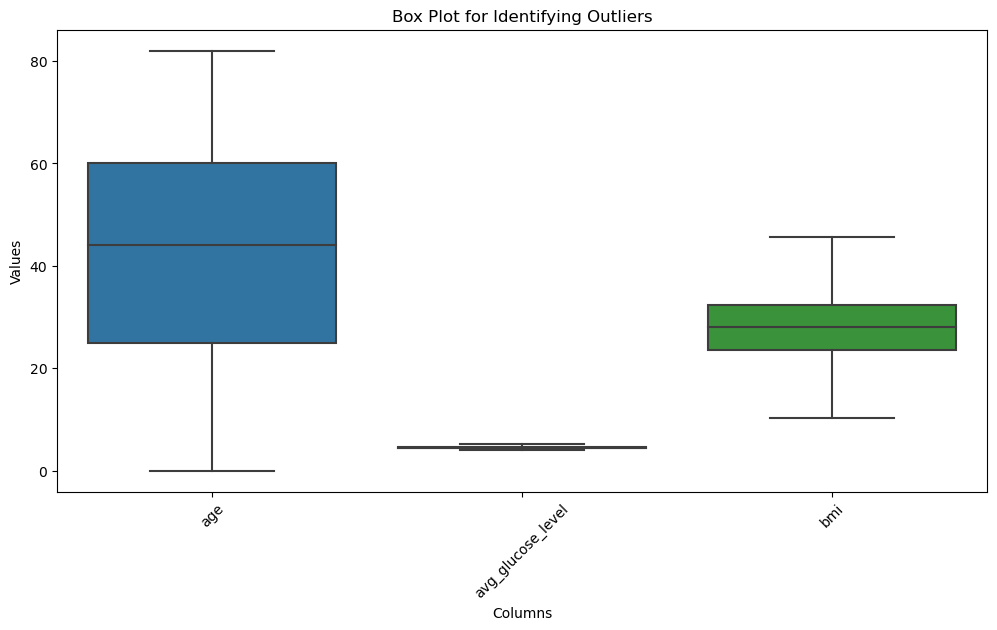

In [49]:
# Visualizing outliers

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']]) 

plt.title('Box Plot for Identifying Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.xticks(rotation=45) 
plt.show()


In [50]:
# 2.Completeness
missing_values = df.isnull().sum()
print("Missing Values: ",len(missing_values[missing_values > 0])," enteries")


Missing Values:  0  enteries


In [51]:
#3. Consistency
# Check for logical relationships
# Age vs. Health Conditions
age_invalid = df[(df['age'] < 15) & (df['hypertension'] == 1)]
print(f"Invalid age with hypertension: {len(age_invalid)} entries")

# Age vs. Marriage status
age_invalid = df[(df['age'] < 18) & (df['ever_married'] == 1)]
print(f"\nInvalid age with marriage status: {len(age_invalid)} entries")



Invalid age with hypertension: 0 entries

Invalid age with marriage status: 0 entries


In [52]:
df.to_csv('cleaned_dataset.csv')

# Standardization

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

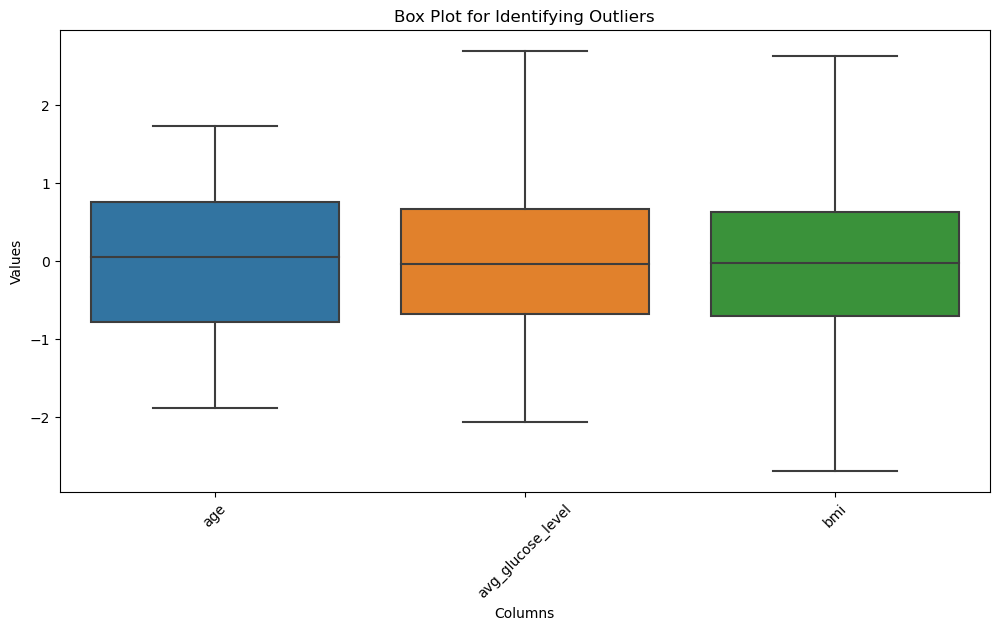

In [54]:
# Visualizing standardized numeric attributes

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']]) 

plt.title('Box Plot for Identifying Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.xticks(rotation=45) 
plt.show()


In [55]:
df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.067980,0,1,1,1,0.754874,1.260414,1,0,...,0,0,0,1,0,0,0,1,0,0
2,31112,1.643047,0,1,1,0,0.754874,0.643915,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,0.271734,0,0,1,1,0.372756,0.929610,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,1.598811,1,0,1,0,-0.046428,-0.634192,1,1,...,0,0,0,0,1,0,0,0,1,0
5,56669,1.687283,0,0,1,1,-0.510647,0.117636,1,0,...,0,0,0,1,0,0,0,1,0,0


In [56]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

# Dimensionality Reduction
Using Principle Component Analysis

In [57]:
from sklearn.decomposition import PCA

In [58]:
y = df['stroke']

In [59]:
# Dropping 'id' if still present
df = df.drop(columns=['id'], errors='ignore')

# Assuming df is your DataFrame with features (excluding the target variable)
X = df.drop(columns=['stroke'], errors='ignore')

In [60]:
pca = PCA().fit(X)  
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print(cumulative_variance)

[0.30430024 0.48911451 0.60817553 0.69894822 0.76054079 0.8129921
 0.85906619 0.89244753 0.92162989 0.94727668 0.96676815 0.98102702
 0.9912314  0.99892644 0.99994341 1.         1.         1.
 1.        ]


In [61]:
# individual explained variance
print(explained_variance)

[3.04300245e-01 1.84814265e-01 1.19061023e-01 9.07726869e-02
 6.15925662e-02 5.24513105e-02 4.60740983e-02 3.33813401e-02
 2.91823594e-02 2.56467909e-02 1.94914638e-02 1.42588729e-02
 1.02043825e-02 7.69503968e-03 1.01696799e-03 5.65886134e-05
 3.51840700e-18 0.00000000e+00 0.00000000e+00]


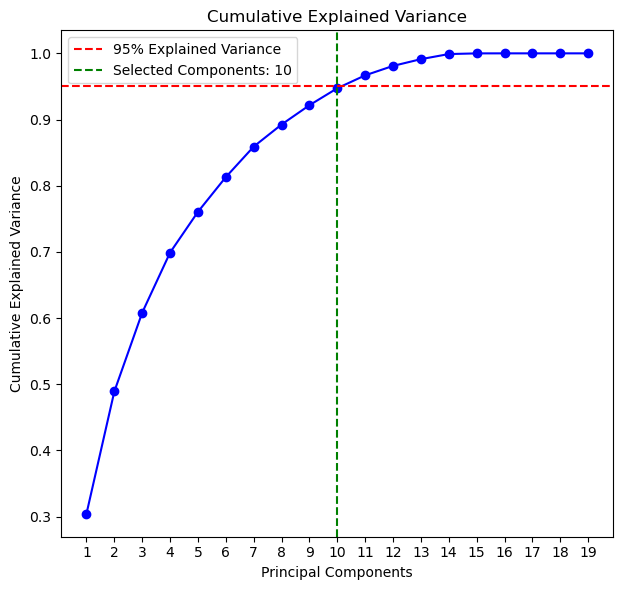

In [62]:
# cumulative

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=10, color='g', linestyle='--', label='Selected Components: 10')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.title('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend()

plt.tight_layout()
plt.show()


In [63]:
pca_cumulative=PCA(n_components=10) # cumulative

In [64]:
pca_cumulative.fit(X)

PCA(n_components=10)

In [65]:
joblib.dump(pca_cumulative, 'pca.joblib')

['pca.joblib']

In [66]:
x_pca_cumulative=pca_cumulative.transform(X)

In [67]:
#Scaled data dimensions
df.shape

(4873, 20)

In [68]:
# Data dimensions after dimantionality reduction
x_pca_cumulative.shape

(4873, 10)

In [69]:
x_pca_cumulative

array([[ 1.71226995,  0.8266446 ,  0.28196167, ..., -0.19525983,
        -0.65777744,  0.11944326],
       [ 1.72136229,  0.79970266, -0.47849942, ...,  0.47932879,
         0.02189006,  0.01422425],
       [ 0.94237435,  0.39449253,  0.50386439, ..., -0.33036776,
         0.67294801, -0.17880038],
       ...,
       [ 2.41077829,  1.47176026, -0.01865943, ...,  0.41941013,
        -0.09633333, -0.54111441],
       [ 0.19825918, -0.31827775,  0.20620037, ..., -0.13931577,
        -0.03280844, -0.51900094],
       [-0.23177295, -0.2351373 , -0.39395423, ...,  0.32822175,
         0.31544739,  0.90467833]])

In [70]:
# Conversion to DataFrame
df_pca_cumulative = pd.DataFrame(x_pca_cumulative, columns=[f'PC{i+1}' for i in range(x_pca_cumulative.shape[1])])


In [71]:
df_pca_cumulative.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.712270,0.826645,0.281962,-0.938249,-0.016611,-0.598070,0.451039,-0.195260,-0.657777,0.119443
1,1.721362,0.799703,-0.478499,-0.762737,0.786096,0.198542,-0.468932,0.479329,0.021890,0.014224
2,0.942374,0.394493,0.503864,0.575156,-0.098993,-0.678869,0.516941,-0.330368,0.672948,-0.178800
3,0.959378,-0.137137,-1.745865,0.435700,-0.142426,0.857813,-0.503743,0.199672,0.003364,-0.570346
4,1.414302,-0.497231,-0.848806,-1.024948,0.197716,-0.713670,0.455378,-0.148947,-0.621775,0.172024


In [72]:
df_pca_cumulative.to_csv('dataset_cumulative_pca.csv')

# Machine Learning Modeling and Evaluation

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [74]:
def evaluation(X_test, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # log loss and binary cross entropy are same
    y_pred_probs = model.predict_proba(X_test)  # Probabilities for each class
    loss = log_loss(y_test, y_pred_probs)
    print(f"Log Loss: {loss:.2f}")

    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    print(f"Precision: {precision:.2f}")

    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    print(f"Recall: {recall:.2f}")

    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    print(f"F1 Score: {f1:.2f}")

    # For binary classification, y_pred_probs[:, 1] represents the probability of the positive class
    roc_auc = roc_auc_score(y_test, y_pred_probs[:, 1])  # Binary classification
    print(f"ROC AUC Score: {roc_auc:.2f}")


In [75]:
def print_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [76]:
X = df_pca_cumulative

In [77]:
print(X.shape, y.shape)

(4873, 10) (4873,)


In [78]:
# print(X.head())
# print(y.head())

In [79]:
y.value_counts()

stroke
0    4668
1     205
Name: count, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [82]:
y_pred = model.predict(X_test)

In [83]:
evaluation(X_test, y_test, y_pred)

Accuracy: 94.56%
Log Loss: 0.17
Precision: 0.89
Recall: 0.95
F1 Score: 0.92
ROC AUC Score: 0.84


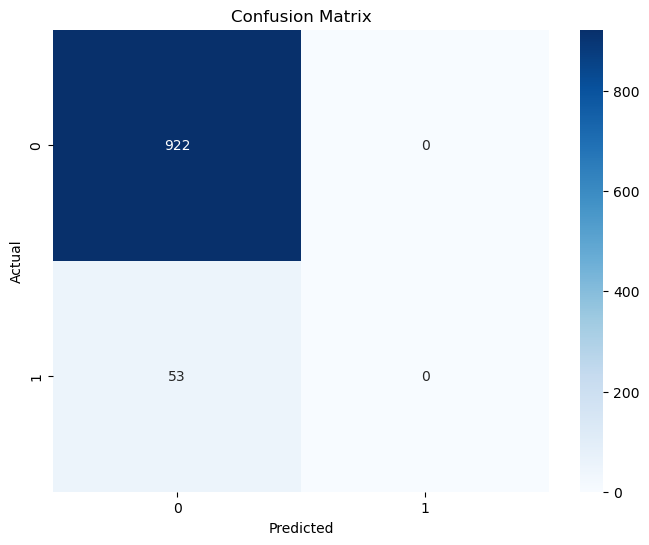

In [84]:
print_confusion_matrix(y_test, y_pred)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [87]:
y_pred = model.predict(X_test)

In [88]:
evaluation(X_test, y_test, y_pred)

Accuracy: 71.28%
Log Loss: 0.50
Precision: 0.94
Recall: 0.71
F1 Score: 0.79
ROC AUC Score: 0.84


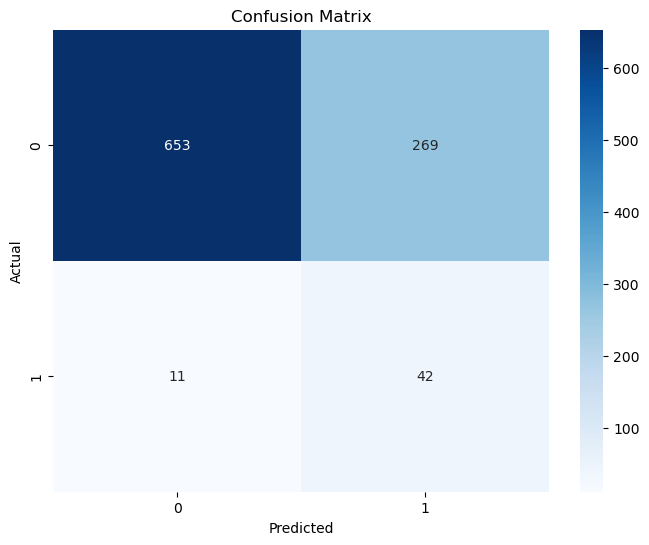

In [89]:
print_confusion_matrix(y_test, y_pred)

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [97]:
print(X_resampled.shape, y_resampled.shape)

(9336, 10) (9336,)


In [98]:
y_resampled.value_counts()

stroke
0    4668
1    4668
Name: count, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [100]:
y_train.value_counts()

stroke
0    3747
1    3721
Name: count, dtype: int64

In [101]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [102]:
y_pred = model.predict(X_test)

In [103]:
# print(X_test.head())
# print(y_test.head())

In [104]:
evaluation(X_test, y_test, y_pred)

Accuracy: 94.11%
Log Loss: 0.17
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
ROC AUC Score: 0.99


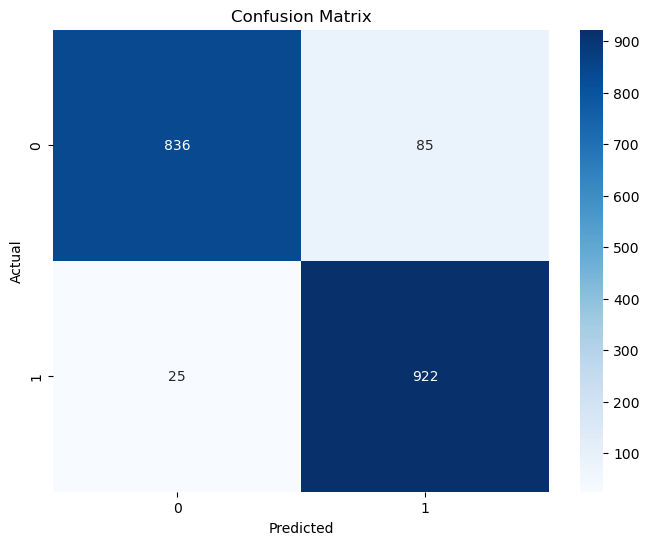

In [105]:
print_confusion_matrix(y_test, y_pred)

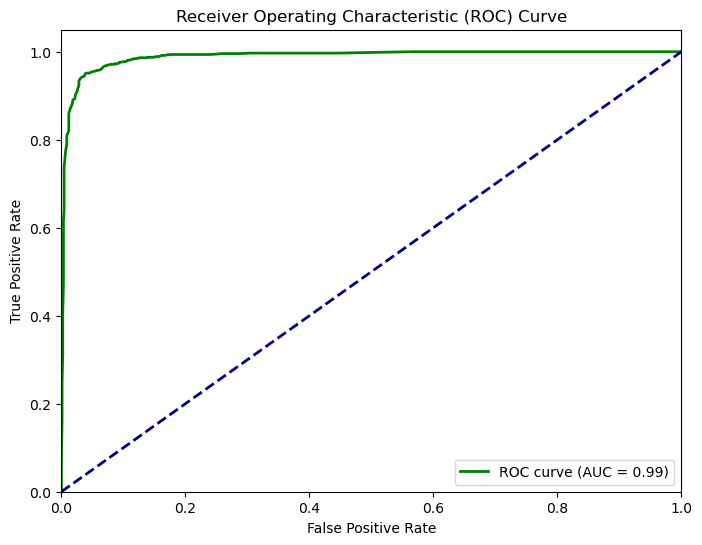

In [106]:
y_pred_probs = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Saving Stroke Prediction Model

In [107]:
joblib.dump(model, 'StrokePrediction.joblib')

['StrokePrediction.joblib']